In [ ]:
!git clone https://github.com/zcemycl/TF2DeepFloorplan.git
!pip install gdown
!gdown https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
!unzip log.zip
!rm log.zip

fatal: destination path 'TF2DeepFloorplan' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
To: /content/log.zip
100% 113M/113M [00:00<00:00, 151MB/s] 
Archive:  log.zip
replace log/store/checkpoint? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!python TF2DeepFloorplan/tests/testNet.py

Traceback (most recent call last):
  File "TF2DeepFloorplan/tests/testNet.py", line 2, in <module>
    from net import *
ModuleNotFoundError: No module named 'net'


In [ ]:
import unittest
from net import *
from tensorflow.keras.applications.vgg16 import preprocess_input

class TestCase(unittest.TestCase):

    def test_shape(self):
        x = np.random.randn(600, 420, 3)
        x = preprocess_input(x)
        model = deepfloorplanModel()
        logits_r,logits_cw = model(x)
        self.asertEqual(logits_r.numpy().shape,(600, 420, 3))
        self.asertEqual(logits_cw.numpy().shape,(600, 420, 3))



unittest.main( exit=False)

E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


In [ ]:
# gpu
!pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow scipy Pillow gdown
# cpu
# !pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow-cpu scipy Pillow gdown

### Main Script

In [ ]:
import tensorflow as tf
import sys
sys.path.append('./TF2DeepFloorplan/')
from net import *
from data import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from argparse import Namespace
import os
import gc
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
sys.path.append('./TF2DeepFloorplan/utils/')
from rgb_ind_convertor import *
from util import *
from legend import *
from deploy import *
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [ ]:
import cv2
img = cv2.imread('TF2DeepFloorplan/resources/30939153.jpg', cv2.IMREAD_UNCHANGED)
down_points = (420,600)
resized = cv2.resize(img,down_points,interpolation = cv2.INTER_AREA)
status = cv2.imwrite('TF2DeepFloorplan/resources/30939153_resized.jpg',resized)
inp = mpimg.imread('TF2DeepFloorplan/resources/30939153_resized.jpg')



In [ ]:
args = Namespace(image='TF2DeepFloorplan/resources/30939153_resized.jpg',
        weight='./log/store/G',loadmethod='log',
        postprocess=True,colorize=True,
        save=None)
result = main(args)

./TF2DeepFloorplan/utils/util.py:30: UserWarning: ignoring size because footprint is set
  footprint=el))


(600, 420, 3) (600, 420, 3)


In [ ]:
result[0]

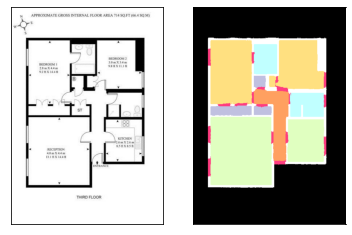

In [ ]:
plt.subplot(1,2,1)
plt.imshow(inp); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(result); plt.xticks([]); plt.yticks([]);

([], <a list of 0 Text major ticklabel objects>)

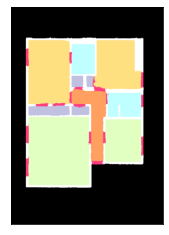

In [ ]:
plt.imshow(result)
plt.xticks([]); plt.yticks([])

In [ ]:
output=cv2.imwrite(r"TF2DeepFloorplan/resources/OPT.jpg",result)

## Breakdown of postprocessing (step by step)

In [ ]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

In [ ]:
opt = cw_color+r_color

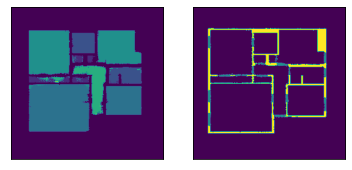

In [ ]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

r = convert_one_hot_to_image(logits_r)[0].numpy()
cw = convert_one_hot_to_image(logits_cw)[0].numpy()
plt.subplot(1,2,1)
plt.imshow(r.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw.squeeze()); plt.xticks([]); plt.yticks([]);

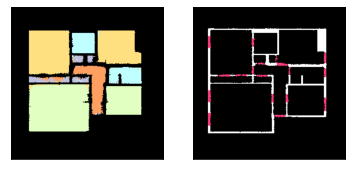

In [ ]:
r_color,cw_color = colorize(r.squeeze(),cw.squeeze())
plt.subplot(1,2,1)
plt.imshow(r_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

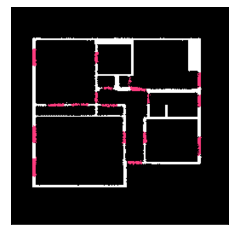

In [ ]:
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

In [ ]:
output=cv2.imwrite(r"TF2DeepFloorplan/resources/2d_opt.jpg",cw_color)

In [ ]:
import sklearn.metrics
import numpy

y_true = cw_color
y_pred = opt
r = sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred)
print(r)

In [ ]:
print(sklearn.metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
y_predicted = model.predict(result, batch_size=64)

In [ ]:
len(opt)

512

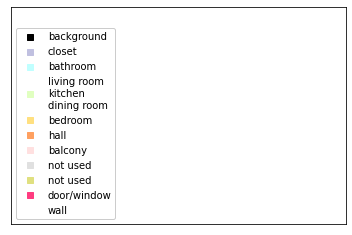

In [ ]:
over255 = lambda x: [p/255 for p in x]
colors2 = [over255(rgb) for rgb in list(floorplan_fuse_map.values())]
colors = ["background", "closet", "bathroom",
          "living room\nkitchen\ndining room",
          "bedroom","hall","balcony","not used","not used",
          "door/window","wall"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors2[i]) for i in range(len(colors))]
labels = colors
legend = plt.legend(handles, labels, loc=3,framealpha=1, frameon=True)

fig  = legend.figure
fig.canvas.draw()
plt.xticks([]); plt.yticks([]);


In [ ]:
!pip3 install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/sample_data/CASE2_2.png")


In [ ]:
grey_img = Image.open('/content/sample_data/CASE2_2.png').convert('L')

max_size=(10000,10000)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(y,x,z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('CASE2_10K.stl')
print(surface)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
number of faces: 57122
